In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from analysis import datasets
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import weibull_min
from scipy.special import gamma
from analysis.explorative_analysis import *
from analysis.first_analysis import *

### Loading 50Hertz Data

In [2]:
aggregated_power = datasets.load_entsoe()

### explorative_analysis(df)

Summary statistics for time frame: 2016-01-01 - 2024-12-31
First 5 rows of the dataframe:


,offshore,onshore
time,,
2016-01-01 00:00:00,21.0,1428.0
2016-01-01 00:15:00,27.0,1379.0
2016-01-01 00:30:00,24.0,1399.0
2016-01-01 00:45:00,20.0,1448.0
2016-01-01 01:00:00,16.0,1517.0



Last 5 rows of the dataframe:


,offshore,onshore
time,,
2024-12-31 22:45:00,NaN,NaN
2024-12-31 23:00:00,NaN,NaN
2024-12-31 23:15:00,NaN,NaN
2024-12-31 23:30:00,NaN,NaN
2024-12-31 23:45:00,NaN,NaN



Summary statistics of the dataframe for time frame: 2016-01-01 - 2024-12-31


,offshore,onshore
count,307842.000000,307842.000000
mean,369.573703,3727.880780
std,346.738522,3359.502551
min,0.000000,0.000000
25%,75.000000,1109.250000
50%,272.000000,2634.000000
75%,600.000000,5413.750000
max,1480.000000,16676.000000


Expected number of entries: 315648 (2016-01-01 00:00:00 - 2024-12-31 23:45:00) 
Actual number of entries: 315648

Shape of dataframe (rows, columns) for time frame: 2016-01-01 - 2024-12-31


(315648, 2)


Checking for duplicates in the index for time frame: 2016-01-01 - 2024-12-31
Index column has no duplicates.

Rows with NaN values:
In total there are: 7806 for time frame 2016-01-01 - 2024-12-31


,offshore,onshore
time,,
2024-10-11 16:30:00,NaN,NaN
2024-10-11 16:45:00,NaN,NaN
2024-10-11 17:00:00,NaN,NaN
2024-10-11 17:15:00,NaN,NaN
2024-10-11 17:30:00,NaN,NaN
...,...,...
2024-12-31 22:45:00,NaN,NaN
2024-12-31 23:00:00,NaN,NaN
2024-12-31 23:15:00,NaN,NaN



First index with NaN values:
2024-10-11 16:30:00

Last index with NaN values:
2024-12-31 23:45:00
Plotting histogram for: onshore for 2016-01-01 - 2024-12-31


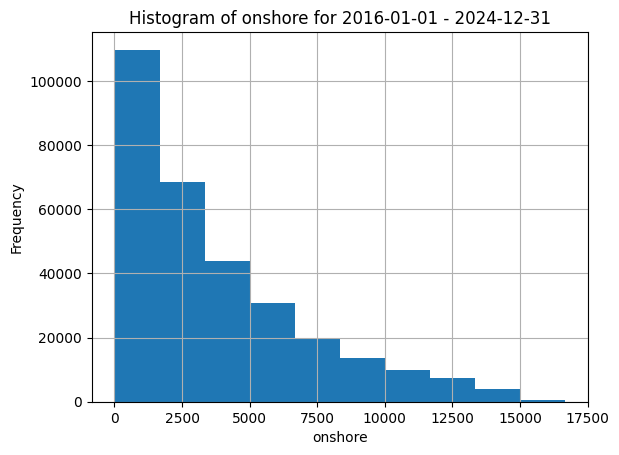


Plotting monthly time series of onshore data for the time period 2016-01-01 - 2024-12-31:


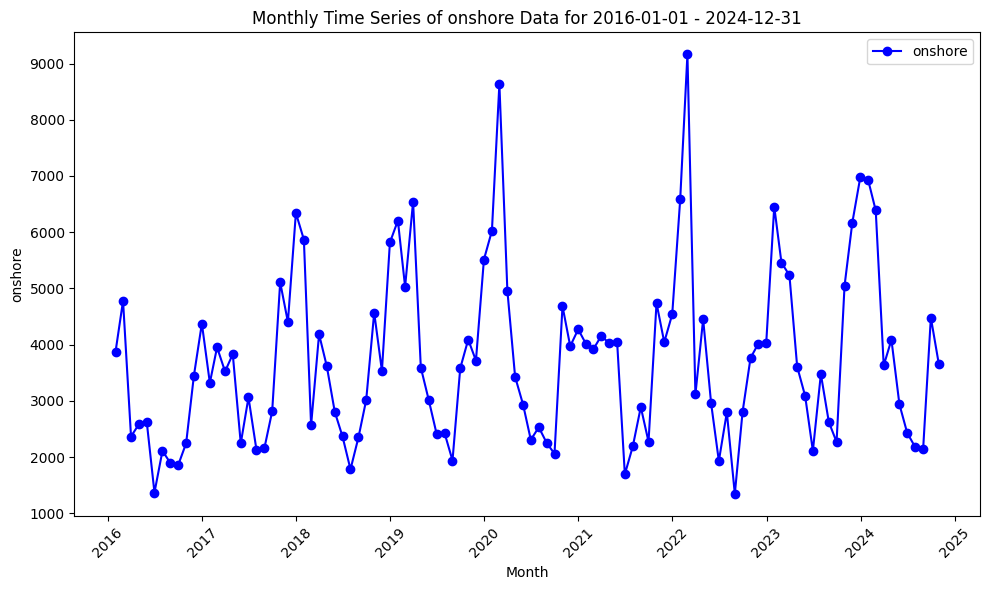

No wind speed columns found. Skipping wind speed plots.
Filtered data for onshore in 03/2018: 2976 records found.


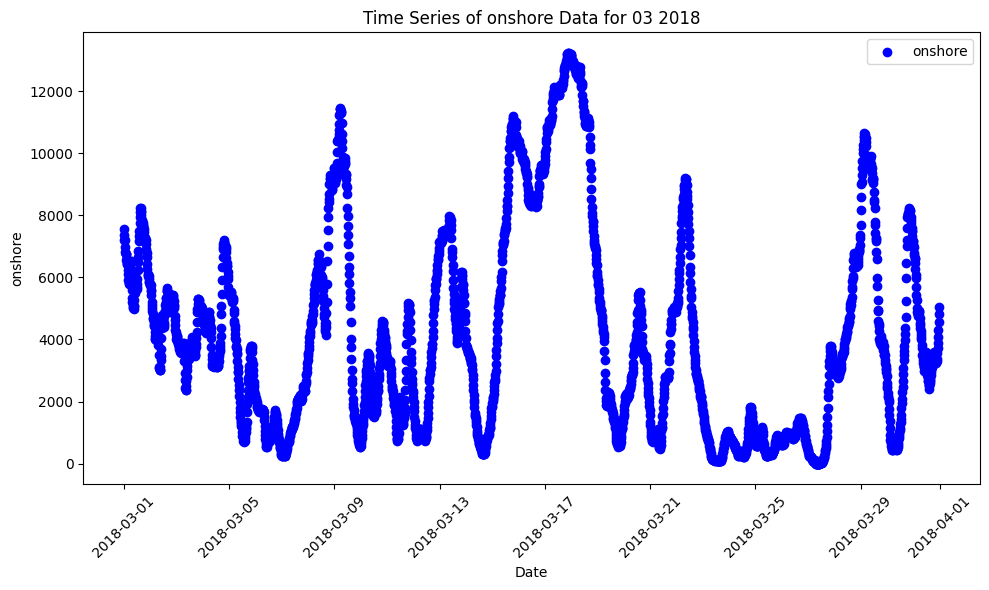

In [3]:
explorative_analysis(aggregated_power)

### First Analyses

I want to analyze for each 15 minute interval which distribution fits the data best. To this end, I turn the data frame into new one with index = day and 96 columns (24 * 4 as there are 4 15 minute intervals per hour) (both onshore and offshore i.e. 192 in total)

In [4]:
reshaped = minute_to_daily_50Hertz(aggregated_power)
reshaped

,offshore_00_00,offshore_00_15,offshore_00_30,offshore_00_45,offshore_01_00,offshore_01_15,offshore_01_30,offshore_01_45,offshore_02_00,offshore_02_15,...,onshore_21_30,onshore_21_45,onshore_22_00,onshore_22_15,onshore_22_30,onshore_22_45,onshore_23_00,onshore_23_15,onshore_23_30,onshore_23_45
date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,21.0,27.0,24.0,20.0,16.0,14.0,8.0,5.0,5.0,6.0,...,316.0,350.0,359.0,385.0,425.0,432.0,467.0,503.0,509.0,528.0
2016-01-02,208.0,226.0,235.0,260.0,292.0,303.0,295.0,280.0,287.0,285.0,...,6813.0,6809.0,6785.0,6760.0,6790.0,6771.0,6700.0,6682.0,6672.0,6721.0
2016-01-03,320.0,320.0,321.0,320.0,321.0,321.0,321.0,320.0,321.0,321.0,...,5377.0,5335.0,5253.0,5296.0,5265.0,5255.0,5255.0,5239.0,5234.0,5220.0
2016-01-04,319.0,320.0,320.0,320.0,320.0,320.0,320.0,320.0,320.0,320.0,...,2284.0,2195.0,2177.0,2173.0,2165.0,2183.0,2194.0,2136.0,2100.0,2050.0
2016-01-05,320.0,319.0,319.0,320.0,319.0,319.0,319.0,320.0,319.0,319.0,...,1475.0,1441.0,1391.0,1414.0,1420.0,1397.0,1353.0,1341.0,1218.0,1121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Analyse the daily time series for each 15-minute interval separately by fitting a Weibull distribution to the time series data for each 15-minute. To be more flexible fit a Weibull distribution rather than a Gaussian distribution. The most important parameter is the "shape" parameter. For "shape" <= 1 the maximum of the distribution is at zero; for "shape" > 1 the maximum is above zero. The scale parameter simply says how large the variable can be

Why weibull? its a flexible distribution because the shape parameter allows for distributions that peak at zero and distributions that ressemble the normal distribution

In [5]:
def get_weibull_mle(data):
    data = data[np.isfinite(data)]
    shape_param, loc, scale_param = weibull_min.fit(data, floc=0)  # floc=0 fixes the location parameter
    return shape_param, scale_param

def get_weibull_mles(data):
    mles = []
    for column in data.columns:
        shape, scale = get_weibull_mle(data[column])
        th_mean = scale*gamma(1+1/shape)
        mean = data[column].mean()
        error = (th_mean - mean) / mean
        mles.append({"time_interval": column, "shape": shape, "scale": scale, "th_mean": th_mean, "mean": mean, "error": error})
    return pd.DataFrame(mles)

Inspect the result of the fit for each 15 minute interval (onshore)
The mean of the data is pretty close to the theoretical mean

In [6]:
mles = get_weibull_mles(reshaped)
weibull_parameters_onshore = mles[mles['time_interval'].str.startswith('onshore')]
weibull_parameters_onshore

,time_interval,shape,scale,th_mean,mean,error
96,onshore_00_00,1.234070,4234.751879,3955.959383,3951.308388,0.001177
97,onshore_00_15,1.229869,4216.769248,3942.362660,3937.562208,0.001219
98,onshore_00_30,1.223095,4197.718625,3929.791219,3925.318990,0.001139
99,onshore_00_45,1.216945,4177.616407,3915.812628,3911.964765,0.000984
100,onshore_01_00,1.211925,4157.172339,3900.658748,3897.234799,0.000879
...,...,...,...,...,...,...
187,onshore_22_45,1.252746,4328.702775,4029.673580,4024.471304,0.001293
188,onshore_23_00,1.249402,4310.649440,4015.307062,4010.149095,0.001286
189,onshore_23_15,1.245312,4292.834732,4001.722830,3996.628197,0.001275
190,onshore_23_30,1.241225,4274.951816,3988.090456,3983.315346,0.001199


Plotting the distribution of the "shape" parameter for the 96 time intervals (onshore). We see that most often positive power is produced.

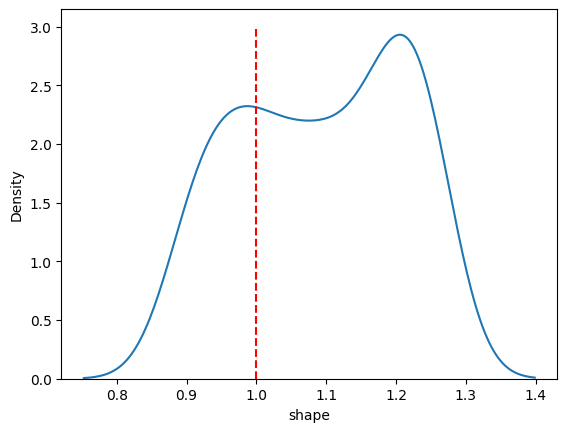

In [7]:
sns.kdeplot(weibull_parameters_onshore["shape"])
plt.vlines(x=1, ymin=0, ymax=3, color='r', linestyle='--')

Plotting the values for the other parameter (scale) which is only relevant for normalization

<Axes: xlabel='scale', ylabel='Density'>

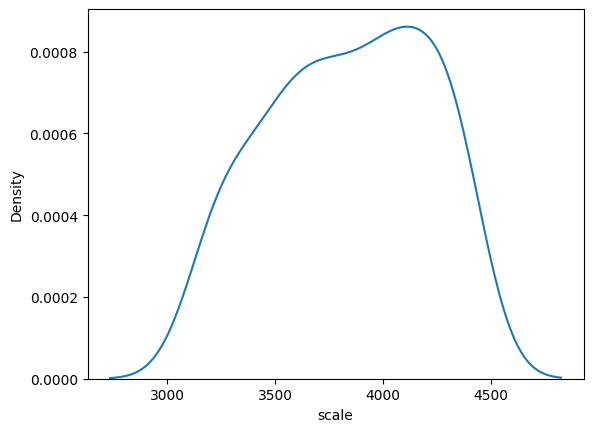

In [8]:
sns.kdeplot(weibull_parameters_onshore["scale"])

In [9]:
weibull_parameters_onshore[weibull_parameters_onshore['shape'] <= 0.9]

,time_interval,shape,scale,th_mean,mean,error
126,onshore_07_30,0.897159,3193.459460,3365.941562,3362.995011,0.000876
127,onshore_07_45,0.894309,3177.622580,3355.146064,3352.166511,0.000889
128,onshore_08_00,0.896678,3181.552412,3354.382344,3351.692236,0.000803


Plot the frequency distribution of the data and the weibull for a selected 15 minute time interval.

In [10]:
def plot_weibull_for_one_interval(Dataframe, time_interval):


    # Step 1: Get the data from the DataFrame

    ## interessanter Wert 07_30
    #data = minute_to_daily_50Hertz(reshaped)['onshore_21_30']
    data = Dataframe[f'onshore_{time_interval}']

    # Step 2: Clean the data by removing NaN and infinite values
    data_clean = data[np.isfinite(data)]

    # Step 3: Plot the histogram of the cleaned data
    plt.figure(figsize=(10, 6))
    plt.hist(data_clean, bins=30, density=True, alpha=0.6, color='blue', label='Data Histogram')

    # Step 4: Fit the Weibull distribution to the cleaned data
    shape_param, loc, scale_param = weibull_min.fit(data_clean, floc=0)  # floc=0 fixes the location parameter

    # Step 5: Generate x values for the Weibull PDF within the specified range
    x = np.linspace(0, 16000, 100)  # Specify range from 0 to 16000

    # Step 6: Calculate the Weibull PDF
    weibull_pdf = weibull_min.pdf(x, shape_param, loc=loc, scale=scale_param)

    # Step 7: Plot the Weibull distribution
    plt.plot(x, weibull_pdf, 'r-', lw=2, label='Weibull Fit (shape={:.2f}, scale={:.2f})'.format(shape_param, scale_param))

    # Finalize the plot
    plt.title(f'Histogram and Weibull Distribution Fit for time interval {time_interval}')
    plt.xlabel('Power (kW)')
    plt.ylabel('Density')
    plt.xlim(0, 16000)  # Set x-axis limits from 0 to 16000
    plt.legend()
    plt.grid()
    plt.show()

In [11]:
t1 = '21_30'
t2 = '08_00'
t3 = '18_00'

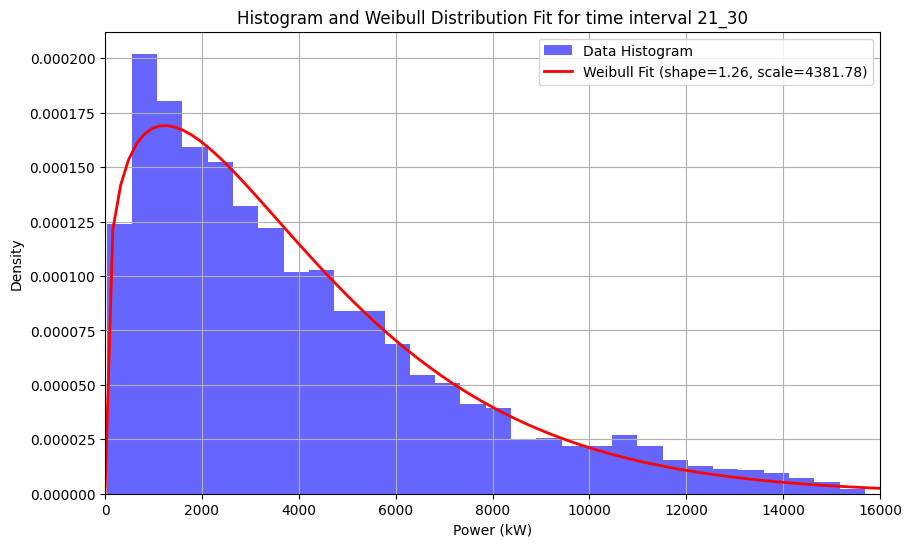

c:\Users\Manuel\Documents\Masterarbeit\.venv\Lib\site-packages\scipy\stats\_continuous_distns.py:2581: RuntimeWarning: divide by zero encountered in power
  return c*pow(x, c-1)*np.exp(-pow(x, c))


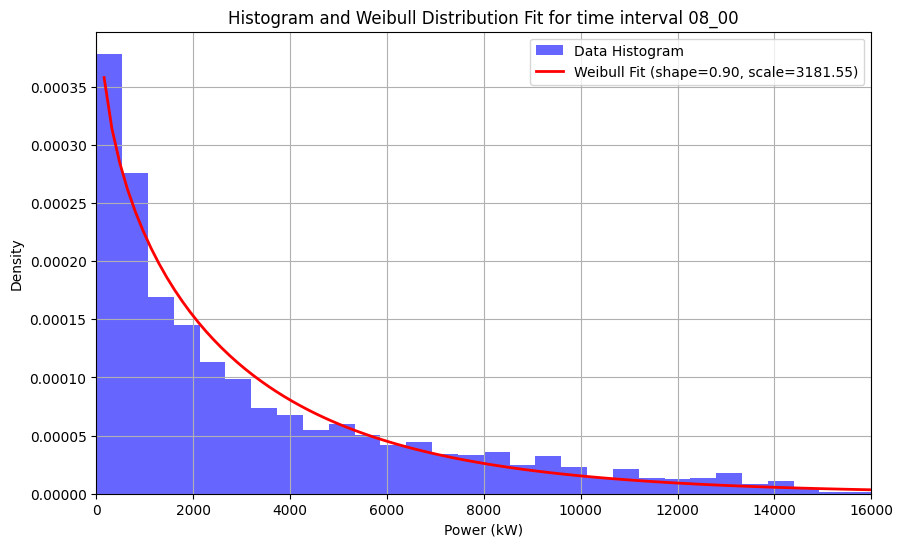

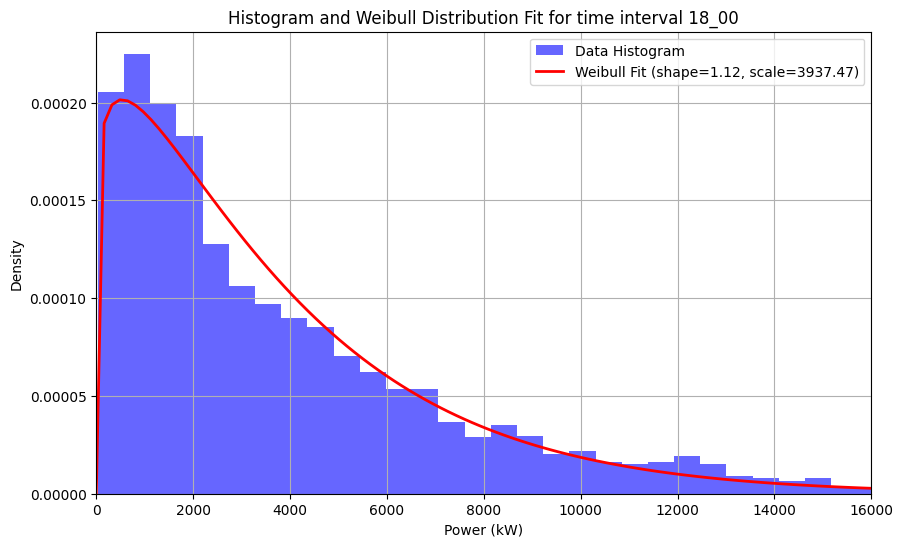

In [12]:
plot_weibull_for_one_interval(reshaped, t1)
plot_weibull_for_one_interval(reshaped, t2)
plot_weibull_for_one_interval(reshaped, t3)

Interpretation:
- At 08:00 the most likely power is very small (Weibull would predict zero)
- At 18:00, 21:00 the most likely power is around 700-1000 kW

Implication for forecasting model:
- Has to take into account that different time intervals result in different distribution shapes


## Time Series of mean per month

## Time Series of 1 month

In [13]:
# Filter the data for January 2024 (or any month you want)
filtered_data = df.loc['2024-01']  # This will return all data for January 2024

# Plot the filtered data
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data.index, filtered_data['onshore'], color='b', label='Onshore')
plt.title('Time Series of Onshore Data for January 2024')
plt.xlabel('Date')
plt.ylabel('Onshore')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

NameError: name 'df' is not defined

In [ ]:
def minute_to_daily_50Hertz(df):
    df = df.copy()
    original_shape = df.shape
    original_frequency = int((df.index[1] - df.index[0]).seconds / 60)

    if isinstance(df, pd.Series):
        df = df.to_frame()

    columns = df.columns
    df.index.name = ""
    df.index = pd.to_datetime(df.index)

    # Extract the date and formatted time
    df["date"] = df.index.date ##creates a new column date, containing just the date (without the time) from the index
    df["time"] = df.index.strftime("%H_%M") ##addsa new column time to represent the time of day in HH_MM format

    # Perform the pivot (reshape)
    reshaped_df = df.pivot(index="date", columns="time", values=columns) #reshapes the DataFrame: each unique date --> row index, each unique time --> a column, values in each cell are the original data values

    # Flatten multi-level columns if necessary
    reshaped_df.columns = [f"{col[0]}_{col[1]}" for col in reshaped_df.columns]
    if reshaped_df.index.dtype == "object":
        reshaped_df.index = pd.to_datetime(reshaped_df.index)

    return reshaped_df

### Focuses on onshore

In [ ]:
data = minute_to_daily(df)
mles = get_weibull_mles(data)
onshore = mles[mles['time_interval'].str.startswith('onshore')]
onshore

## Plotting the distribution of the "shape" parameter for the 96 time intervals (onshore). We see that most often positive power is produced. 

### Find values with shape < 1

### First attempt to include installed capacity. Since data is updated yearly only, I need to interpolate. This is an approximation since in reality more capacity is not added continuously 

In [ ]:
def load_installed_capacity(start_date="2017-01-01", end_date="2024-01-01", method="linear"):

    data = {
        'date': ['2017-06-01', '2018-06-01', '2019-06-01', '2020-06-01', '2021-06-01', '2022-06-01', '2023-06-01'],
        'installed_capacity': [17866, 18346, 18711, 19138, 19748, 20414, 21078]
    }

    # Create a DataFrame
    df = pd.DataFrame(data)

    # Convert 'year' column to datetime format
    df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

    # Set 'year' as the index
    df.set_index('date', inplace=True)

    # Resample to 15-minute intervals and interpolate using the specified method
    df = df.resample("15min").interpolate(method=method)

    dt = pd.date_range(start_date, end_date, inclusive="left", freq="15min")
    df = df.reindex(dt).bfill().ffill()

    return df

In [ ]:
load_installed_capacity("2016-01-01")

In [ ]:
load_installed_capacity("2016-01-01").plot()

In [ ]:
df["installed_capacity"] = load_installed_capacity()

### The red line shows the maximum power output achieved and green the installed capacity. The increase is more or less parallel, showing that it makes sense to consider a normalized power output.

In [ ]:
df.onshore.plot()
df.onshore.expanding().max().plot(color="red")
df.installed_capacity.plot(color="green")

In [ ]:
[(x, df.resample('M').mean().onshore.autocorr(lag=x).item()) for x in range(1,13)]

In [ ]:
pd.plotting.autocorrelation_plot(df.resample('M').mean().offshore)

In [ ]:
# Plot the data
#df.plot(title="Time Series Data")
df2 = df.resample('D').mean()
column = "onshore"
# 1. Autocorrelation and Partial Autocorrelation to detect periodicity
lag_acf = acf(df2[column], nlags=40)
lag_pacf = pacf(df2[column], nlags=40)
display(lag_acf)
display(lag_pacf)

In [ ]:
# 2. Fit an ARMA model to the data (ARMA(p,q) model)
model = ARIMA(df[column], order=(2, 0, 2))  # ARMA is a special case of ARIMA(p, 0, q)
arma_model = model.fit()

# Print the summary of the fitted model
print(arma_model.summary())

# 3. Analyze the residuals to check for periodicity in the residuals
residuals = arma_model.resid

plt.figure(figsize=(10, 4))
plt.plot(residuals)
plt.title('Residuals of ARMA Model')
plt.show()

In [ ]:
# 4. Optionally, use FFT to find periodicity
fft_vals = np.fft.fft(df[column])
fft_freq = np.fft.fftfreq(len(fft_vals))

plt.figure(figsize=(10, 4))
plt.plot(fft_freq, np.abs(fft_vals))
plt.title('Frequency Spectrum')
plt.show()

In [ ]:
lag_acf

In [ ]:
lag_pacf

In [ ]:
df.onshore.hist(bins=30)

In [ ]:
df.offshore.hist(bins=30)

In [ ]:
sns.kdeplot(df.onshore)

In [ ]:
sns.kdeplot(df.offshore)

In [ ]:
df.Area.unique()